<br><br><br>
# Questions
* Should we include engine_id and cycle in our dataset?
* Can we apply mae, mse and rmse to all regressions?
* Does the residual error plot even make sense lol?

<br><br><br>

# 1. Import data, libaries and define global variables

In [28]:
import pandas as pd
import numpy as np
import os
import pickle
import time

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from keras import models, layers
from keras.layers import Dense, Activation
from keras.models import Sequential

In [2]:
cd D:\Datamap Paulo\Documents\GitHub\business-analytics-3\data

D:\Datamap Paulo\Documents\GitHub\business-analytics-3\data


In [3]:
df_training = pickle.load(open("df_training.pkl", "rb"))
df_predict  = pickle.load(open("df_predict.pkl", "rb"))

<br><br>
# 2. Split df_training

In [4]:
def createTrainAndTestSet(df, test_size, random_state = 1):
    """
    This function splits the data into a train and test set.
    """
    
    X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], 
                                                        df[df.columns[-1:]], 
                                                        test_size    = test_size, 
                                                        random_state = random_state)
    
    return X_train.values, X_test.values, y_train.values.ravel(), y_test.values.ravel()

In [5]:
X_train, X_test, y_train, y_test = createTrainAndTestSet(df        = df_training, 
                                                         test_size = 0.20)

print('{} shape: {}'.format('X_train', X_train.shape))
print('{} shape: {}'.format('y_train', y_train.shape))
print('\n')
print('{} shape: {}'.format('X_test', X_test.shape))
print('{} shape: {}'.format('y_test', y_test.shape))

X_train shape: (16504, 18)
y_train shape: (16504,)


X_test shape: (4127, 18)
y_test shape: (4127,)


<br><br>
# 3. Predictors

In [6]:
def plotResidualErrors(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    """
    This function plots the residual errors.
    """    
    # Residual error in training data
    train_pred  = model.predict(X_train)
    train_error = train_pred - y_train.ravel()

    # Residual error in test data
    test_pred   = model.predict(X_test)
    test_error  = test_pred - y_test.ravel()
    
    # Plot the residual errors
    plt.scatter(train_pred, train_error, color = 'blue', label = 'Train data')
    plt.scatter(test_pred, test_error, color = 'green', label = 'Test data')
    plt.legend(loc = 'upper right') 
    plt.title("Residual errors") 
    plt.show()
    

def plotPredictedVsActual(model, X_test = X_test, y_test = y_test):
    """
    This function calculates the predicted vs actual rul.
    """

    # Residual error in test data
    test_pred   = model.predict(X_test)
    test_error  = test_pred - y_test.ravel()

    # Plot results
    fig, ax = plt.subplots()
    ax.scatter(test_pred, y_test, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    ax.set_xlabel('Predicted RUL')
    ax.set_ylabel('Actual RUL')
    ax.set_title(' Predicted RUL vs Actual RUL')
    plt.show()
    

def calculateScores(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    """
    This function calculates all the scores of the model. This includes:
    - MAE   = mean of the absolute value of the errors
    - MSE   = mean of the squared errors
    - RMSQE = square root of the mean of the squarred errors
    - R2    = proportion of the variance that is explained by the independent variables
    """    
    
    # Evaluation scores training data
    x_pred = model.predict(X_train)
    print('Evaluation metrics training data')
    print('mean_absolute_error:     ', mean_absolute_error(y_train, x_pred))
    print('mean_squared_error:      ', mean_squared_error(y_train, x_pred))
    print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_train, x_pred)))    
    print('r2_score:                ', r2_score(y_train, x_pred))
    print('\n')
    
    # Evaluation scores test data
    y_pred = model.predict(X_test)
    print('Evaluation metrics test data')
    print('mean_absolute_error:     ', mean_absolute_error(y_test, y_pred))
    print('mean_squared_error:      ', mean_squared_error(y_test, y_pred))
    print('root_mean_squared_error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2_score:                ' , r2_score(y_test, y_pred))

## 3.1 Linear Regression

In [7]:
# Define LinearRegression object and fit it to our X_train, and y_train data
reg = LinearRegression()
reg.fit(X = X_train, y = y_train)

# Print out coefficients
coefDataFrame = pd.DataFrame(reg.coef_, df_training.columns[:-1], columns=['Coefficients'])
print('Coefficients:')
display(coefDataFrame)

Coefficients:


,Coefficients
engine_id,0.286353
cycle,-0.417279
setting1,0.071531
setting2,0.665072
s2,-2.846815
s3,-1.437814
s4,-4.633318
s7,3.366926
s8,-1.938865
s9,-4.802952


Evaluation metrics training data
mean_absolute_error:      30.578724262823698
mean_squared_error:       1576.048547726455
root_mean_squared_error:  39.69947792763092
r2_score:                 0.6664733576174661


Evaluation metrics test data
mean_absolute_error:      30.014052852336903
mean_squared_error:       1532.85550260448
root_mean_squared_error:  39.15169859156152
r2_score:                 0.6819696632433949


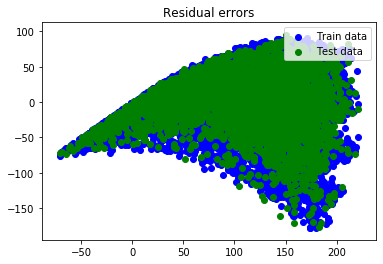

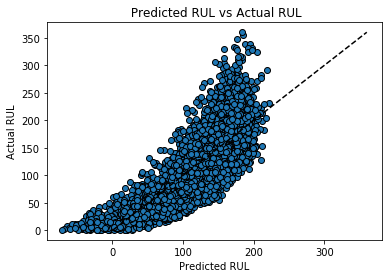

In [8]:
calculateScores(model       = reg)
plotResidualErrors(model    = reg)
plotPredictedVsActual(model = reg)

<br><br>

## 3.2 Decision Tree Regressor

Evaluation metrics training data
mean_absolute_error:      0.0
mean_squared_error:       0.0
root_mean_squared_error:  0.0
r2_score:                 1.0


Evaluation metrics test data
mean_absolute_error:      11.711897261933608
mean_squared_error:       444.26484128907197
root_mean_squared_error:  21.077590974517747
r2_score:                 0.9078258212569825


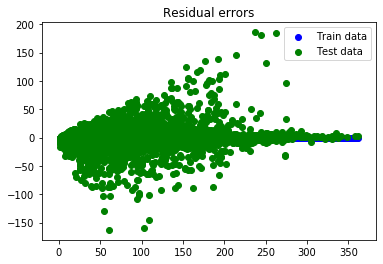

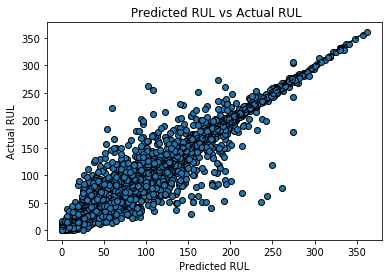

In [9]:
# Define regression model and fit it
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X = X_train,
                   y = y_train)

# Plot results
calculateScores(model       = tree_regressor)
plotResidualErrors(model    = tree_regressor)
plotPredictedVsActual(model = tree_regressor)

<br><br>

## 3.3 SVM

Evaluation metrics training data
mean_absolute_error:      1.4130588889044045
mean_squared_error:       64.87027868514534
root_mean_squared_error:  8.054208755994926
r2_score:                 0.986272017907388


Evaluation metrics test data
mean_absolute_error:      22.66887089193436
mean_squared_error:       1089.9094458945165
root_mean_squared_error:  33.0137766075697
r2_score:                 0.7738702261739039


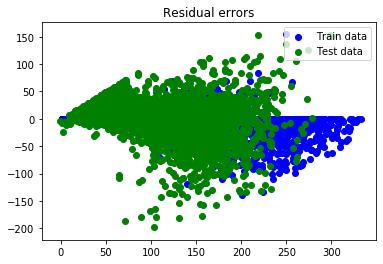

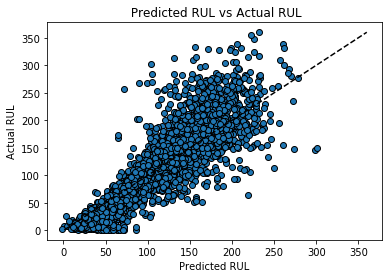

Wall time: 3min 16s


In [10]:
%%time

# Define model
svr_rbf  = SVR(kernel  = 'rbf',    C = 100, gamma = 0.1, epsilon = .1)
svr_rbf.fit(X = X_train, y = y_train)

# Train svr and plot the results
calculateScores(model       = svr_rbf)
plotResidualErrors(model    = svr_rbf)
plotPredictedVsActual(model = svr_rbf)

<br><br>

## 3.4 Random Forest (bagging)

Evaluation metrics training data
mean_absolute_error:      4.088876635967039
mean_squared_error:       36.11811981337858
root_mean_squared_error:  6.009835256758589
r2_score:                 0.9923566090347256


Evaluation metrics test data
mean_absolute_error:      10.70589774654713
mean_squared_error:       245.50570826266053
root_mean_squared_error:  15.668621772914825
r2_score:                 0.9490635203763305


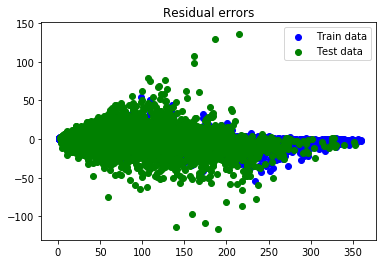

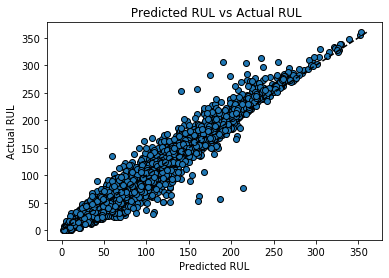

Wall time: 15.5 s


In [11]:
%%time

# Define and fit random forest object
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X = X_train, y = y_train)

# Plot results
calculateScores(model       = random_forest_regressor)
plotResidualErrors(model    = random_forest_regressor)
plotPredictedVsActual(model = random_forest_regressor)

<br><br>

## 3.5 AdaBoost (boosting)

Evaluation metrics training data
mean_absolute_error:      32.70277204167707
mean_squared_error:       1516.2786761136617
root_mean_squared_error:  38.93942316102874
r2_score:                 0.6791219810519454


Evaluation metrics test data
mean_absolute_error:      32.62445141700849
mean_squared_error:       1515.1621433895439
root_mean_squared_error:  38.92508373002612
r2_score:                 0.6856406061208682


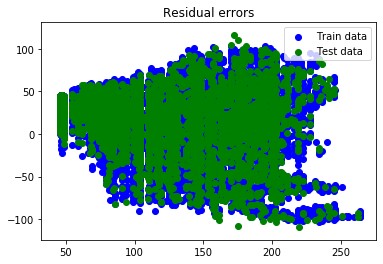

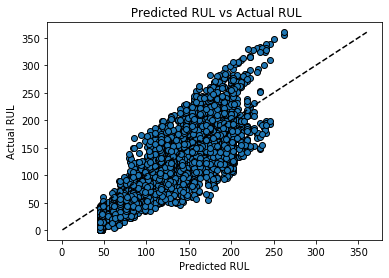

Wall time: 2.71 s


In [12]:
%%time

# Define and fit random forest object
adaboost = AdaBoostRegressor(random_state=0)
adaboost.fit(X = X_train, y = y_train)

# Plot results
calculateScores(model       = adaboost)
plotResidualErrors(model    = adaboost)
plotPredictedVsActual(model = adaboost)

<br><br>

## 3.6 Gradient Boosting (boosting)

Evaluation metrics training data
mean_absolute_error:      17.396966695856754
mean_squared_error:       552.3954564749171
root_mean_squared_error:  23.503094614856934
r2_score:                 0.8831009348466952


Evaluation metrics test data
mean_absolute_error:      17.588810147113186
mean_squared_error:       572.8576648927457
root_mean_squared_error:  23.934445155314247
r2_score:                 0.8811459294304719


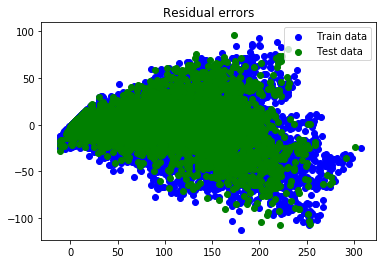

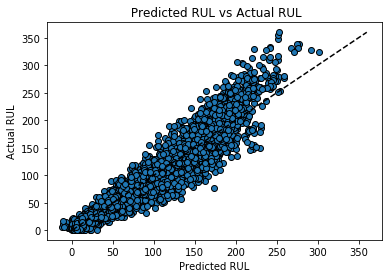

Wall time: 4.65 s


In [13]:
%%time

# Define and fit random forest object
gradboost = GradientBoostingRegressor(random_state=0)
gradboost.fit(X = X_train, y = y_train)

# Plot results
calculateScores(model       = gradboost)
plotResidualErrors(model    = gradboost)
plotPredictedVsActual(model = gradboost)

<br><br>

## 3.7 XGBRegressor (boosting)

Evaluation metrics training data
mean_absolute_error:      4.43181144039296
mean_squared_error:       36.09681448977339
root_mean_squared_error:  6.008062457213089
r2_score:                 0.9923611177112236


Evaluation metrics test data
mean_absolute_error:      7.308702369918539
mean_squared_error:       102.37286327818852
root_mean_squared_error:  10.117947582300895
r2_score:                 0.9787601139652229


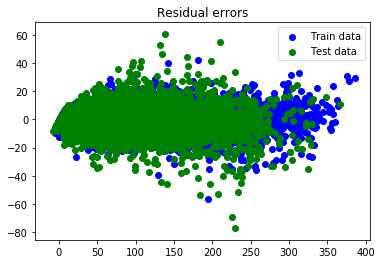

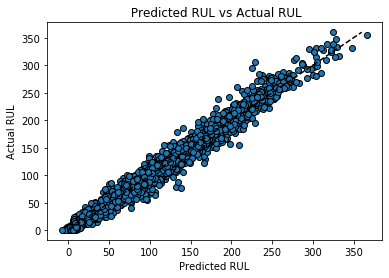

Wall time: 2.45 s


In [14]:
%%time

# Define and fit random forest object
xgbr = xgb.XGBRegressor(random_state = 0) 
xgbr.fit(X = X_train, y = y_train)

# Plot results
calculateScores(model       = xgbr)
plotResidualErrors(model    = xgbr)
plotPredictedVsActual(model = xgbr)

<br><br>

## 3.8 Neural Network

In [29]:
# Sequential model
model = models.Sequential() 

# Hidden layers
model.add(layers.Dense(units      = 128, 
                       activation ='relu',
                       input_dim  = X_train.shape[1]))
model.add(layers.Dense(units      = 128, 
                       activation = 'relu'))
model.add(layers.Dense(units      = 96, 
                       activation = 'relu'))
model.add(layers.Dense(units      = 64, 
                       activation ='relu'))
model.add(layers.Dense(units      = 1))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               2432      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 37,601
Trainable params: 37,601
Non-trainable params: 0
_________________________________________________________________


In [54]:
%%time

X_train_nn = X_train[:-1000]
y_train_nn = y_train[:-1000]
X_val_nn   = X_train[-1000: ]
y_val_nn   = y_train[-1000: ]

history = model.fit(x               = X_train_nn, 
                    y               = y_train_nn, 
                    epochs          = 200,
                    validation_data = (X_val_nn, y_val_nn))

Train on 15504 samples, validate on 1000 samples
Epoch 1/200
15504/15504 [==============================] - 1s 47us/step - loss: 110.6669 - mse: 110.6668 - mae: 6.8600 - val_loss: 165.8834 - val_mse: 165.8834 - val_mae: 8.7462
Epoch 2/200
15504/15504 [==============================] - 1s 46us/step - loss: 185.5441 - mse: 185.5441 - mae: 8.5513 - val_loss: 103.4060 - val_mse: 103.4060 - val_mae: 7.1225
Epoch 3/200
15504/15504 [==============================] - 1s 47us/step - loss: 82.6538 - mse: 82.6538 - mae: 6.3268 - val_loss: 77.1584 - val_mse: 77.1584 - val_mae: 6.2905
Epoch 4/200
15504/15504 [==============================] - 1s 48us/step - loss: 84.1245 - mse: 84.1245 - mae: 6.2325 - val_loss: 93.7827 - val_mse: 93.7827 - val_mae: 6.7609
Epoch 5/200
15504/15504 [==============================] - 1s 45us/step - loss: 115.0333 - mse: 115.0332 - mae: 7.0652 - val_loss: 136.6629 - val_mse: 136.6629 - val_mae: 7.8430
Epoch 6/200
15504/15504 [==============================] - 1s 48us/st

Epoch 47/200
15504/15504 [==============================] - 1s 49us/step - loss: 75.7570 - mse: 75.7570 - mae: 5.9985 - val_loss: 161.9449 - val_mse: 161.9449 - val_mae: 8.2752
Epoch 48/200
15504/15504 [==============================] - 1s 48us/step - loss: 162.9873 - mse: 162.9873 - mae: 7.8031 - val_loss: 181.1961 - val_mse: 181.1961 - val_mae: 8.8497
Epoch 49/200
15504/15504 [==============================] - 1s 47us/step - loss: 75.5747 - mse: 75.5748 - mae: 6.0267 - val_loss: 104.5632 - val_mse: 104.5632 - val_mae: 7.1293
Epoch 50/200
15504/15504 [==============================] - 1s 48us/step - loss: 71.3822 - mse: 71.3822 - mae: 5.8832 - val_loss: 143.3445 - val_mse: 143.3445 - val_mae: 8.0510
Epoch 51/200
15504/15504 [==============================] - 1s 51us/step - loss: 137.4399 - mse: 137.4400 - mae: 7.4856 - val_loss: 241.9063 - val_mse: 241.9063 - val_mae: 9.8979
Epoch 52/200
15504/15504 [==============================] - 1s 52us/step - loss: 96.3811 - mse: 96.3810 - mae: 

15504/15504 [==============================] - 1s 43us/step - loss: 111.9808 - mse: 111.9807 - mae: 6.9539 - val_loss: 188.4703 - val_mse: 188.4703 - val_mae: 8.9372
Epoch 94/200
15504/15504 [==============================] - 1s 44us/step - loss: 67.7232 - mse: 67.7233 - mae: 5.6844 - val_loss: 143.6759 - val_mse: 143.6759 - val_mae: 8.1123
Epoch 95/200
15504/15504 [==============================] - 1s 43us/step - loss: 65.0691 - mse: 65.0691 - mae: 5.5975 - val_loss: 191.5766 - val_mse: 191.5766 - val_mae: 9.2419
Epoch 96/200
15504/15504 [==============================] - 1s 43us/step - loss: 141.4237 - mse: 141.4237 - mae: 7.3095 - val_loss: 396.4306 - val_mse: 396.4306 - val_mae: 11.6523
Epoch 97/200
15504/15504 [==============================] - 1s 42us/step - loss: 148.4259 - mse: 148.4259 - mae: 7.6987 - val_loss: 175.4573 - val_mse: 175.4573 - val_mae: 8.8676
Epoch 98/200
15504/15504 [==============================] - 1s 44us/step - loss: 59.6129 - mse: 59.6129 - mae: 5.4888 - v

Epoch 139/200
15504/15504 [==============================] - 1s 43us/step - loss: 113.7906 - mse: 113.7906 - mae: 6.9670 - val_loss: 245.0163 - val_mse: 245.0163 - val_mae: 10.0828
Epoch 140/200
15504/15504 [==============================] - 1s 43us/step - loss: 71.6650 - mse: 71.6650 - mae: 5.7379 - val_loss: 217.6496 - val_mse: 217.6496 - val_mae: 9.2145
Epoch 141/200
15504/15504 [==============================] - 1s 43us/step - loss: 66.3831 - mse: 66.3831 - mae: 5.6247 - val_loss: 325.8269 - val_mse: 325.8269 - val_mae: 11.3586
Epoch 142/200
15504/15504 [==============================] - 1s 44us/step - loss: 76.0980 - mse: 76.0980 - mae: 5.9921 - val_loss: 237.0929 - val_mse: 237.0929 - val_mae: 10.0709
Epoch 143/200
15504/15504 [==============================] - 1s 45us/step - loss: 97.2649 - mse: 97.2649 - mae: 6.4470 - val_loss: 192.8377 - val_mse: 192.8377 - val_mae: 8.9531
Epoch 144/200
15504/15504 [==============================] - 1s 45us/step - loss: 61.1370 - mse: 61.1370 

Epoch 185/200
15504/15504 [==============================] - 1s 52us/step - loss: 104.7334 - mse: 104.7334 - mae: 6.6376 - val_loss: 206.1065 - val_mse: 206.1065 - val_mae: 9.2503
Epoch 186/200
15504/15504 [==============================] - 1s 50us/step - loss: 58.8608 - mse: 58.8608 - mae: 5.3553 - val_loss: 261.5444 - val_mse: 261.5444 - val_mae: 9.9376
Epoch 187/200
15504/15504 [==============================] - 1s 47us/step - loss: 75.9422 - mse: 75.9422 - mae: 5.8472 - val_loss: 290.4506 - val_mse: 290.4506 - val_mae: 11.1382
Epoch 188/200
15504/15504 [==============================] - 1s 44us/step - loss: 61.4731 - mse: 61.4731 - mae: 5.5436 - val_loss: 180.6254 - val_mse: 180.6254 - val_mae: 8.7809
Epoch 189/200
15504/15504 [==============================] - 1s 46us/step - loss: 78.8292 - mse: 78.8292 - mae: 5.9979 - val_loss: 199.8304 - val_mse: 199.8304 - val_mae: 9.3188
Epoch 190/200
15504/15504 [==============================] - 1s 46us/step - loss: 80.2996 - mse: 80.2996 - 

Evaluation metrics training data
mean_absolute_error:      8.22988453196832
mean_squared_error:       157.16288604488864
root_mean_squared_error:  12.536462261933732
r2_score:                 0.9667408660949457


Evaluation metrics test data
mean_absolute_error:      15.381603728433715
mean_squared_error:       762.6028280403636
root_mean_squared_error:  27.615264402869
r2_score:                 0.841778410423467


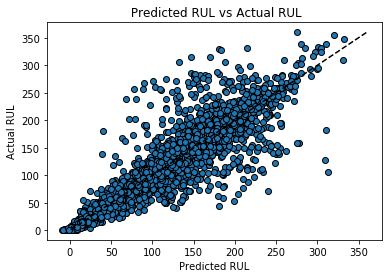

In [57]:
# Plot results
calculateScores(model       = model)
# plotResidualErrors(model    = model)
plotPredictedVsActual(model = model)

In [60]:
history.history.keys()

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])

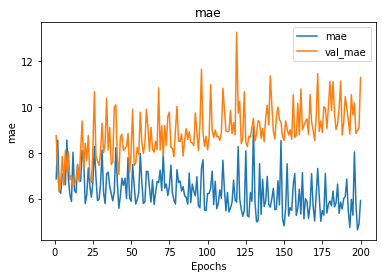

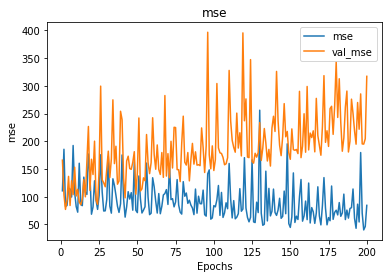

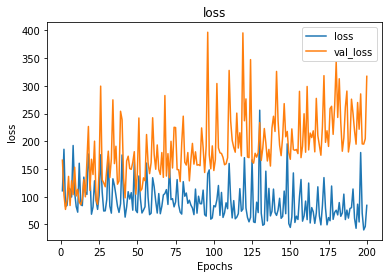

In [66]:
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('mae')
plt.legend(['mae', 'val_mae'])
plt.show();

plt.plot(range(1, len(history.history['mse']) + 1), history.history['mse'])
plt.plot(range(1, len(history.history['val_mse']) + 1), history.history['val_mse'])
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.title('mse')
plt.legend(['mse', 'val_mse'])
plt.show();

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show();